In [1]:
# Michael Spearing
# February 23, 2017
# Data Science Lab 6

import numpy as np
#np.set_printoptions(threshold='nan')
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn as skl

from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

# Problem 2: Spectral Clustering

In [2]:
# 1) Implement the NG, Jordan and Weiss SC algorithm
def sc_Normalized_NJW(similarityGraph, k):
    # Construct the similarity graph.
    # Compute the normalized Laplacian, Lsym
    degreeMatrix = np.zeros(similarityGraph.shape) 
    for i in range(len(similarityGraph)):
        degreeMatrix[i,i] = sum(similarityGraph[i])
    graphLaplacian = degreeMatrix - similarityGraph
    
    symmetricMatrix = np.sqrt(np.linalg.inv(degreeMatrix)).dot(graphLaplacian.dot(np.sqrt(np.linalg.inv(degreeMatrix))))
    # Compute the first k eigenvectors of Lsym
    # Construct U, with k eigen vectors as columns
    eigenValues, eigenVectors = np.linalg.eig(symmetricMatrix)
    t = np.sort(np.argsort(eigenValues)[:k])
    u = eigenVectors[t[0]]
    for i in range(1,k):
        u = np.vstack((u,eigenVectors[t[i]]))
    u = np.transpose(u)
    # Construct T by normalizing the rows of U to norm 1
    t = np.zeros(u.shape)
    for i in range(len(u)):
        for j in range(len(u[0])):
            denom = 0
            for m in range(k):
                denom += np.square(u[i,m])
            if(denom == 0):
                denom = 1
            t[i,j] = u[i,j] / np.sqrt(denom)
    y = np.zeros((len(t),k))
    for i in range(len(t)):
        y[i] = t[i,:]
    # Run k-means on the rows of T to make k clusters
    return(skl.cluster.KMeans(k).fit_predict(y**2))
    # output clusters 1...k

In [3]:
def constructSimilarityGraph(data, option, var=0):
    if(option == 0):
        print "E neighborhood graph"
        
        similarityGraph = generateEuclideanDistance(data)
        for i in range(len(similarityGraph)):
            for j in range(len(similarityGraph)):
                if (similarityGraph[i,j] < var):
                    similarityGraph[i,j] = 1
                else:
                    similarityGraph[i,j] = 0
                    
    elif(option == 1 or option == 2):
        # For this implementation, we will ignore the weights. Being the
        # closest neighbor or the kth will both carry a value of 1.
        # To increase the accuracy, we could change this
        distanceGraph = generateEuclideanDistance(data)
        similarityGraph = np.zeros(distanceGraph.shape)
        for i in range(len(similarityGraph)):
            topTen = distanceGraph[i].argsort()[:var+1]
            for t in topTen:
                similarityGraph[i,t] = 1
            
        if(option == 1):
            print "k-nearest neighbor graph - ignore direction"
            for i in range(len(similarityGraph)):
                for j in range(len(similarityGraph)):
                    if(similarityGraph[i,j] == 1):
                        similarityGraph[j,i] = 1
        else:
            print 'k-nearest neighbor graph - mutual neighbors'
            for i in range(len(similarityGraph)):
                for j in range(len(similarityGraph)):
                    if(similarityGraph[i,j] != 1 or similarityGraph[j,i] != 1):
                        similarityGraph[i,j] = 0
                        similarityGraph[j,i] = 0
    
    elif(option == 3):
        print "The fully connected Graph"
        similarityGraph = np.zeros((len(data),len(data)))
        if var == 0:
                var = 1
        for i in range(len(data)):
            for j in range(len(data)):
                similarityGraph[i,j] = math.exp(-(((data[i,0] - data[j,0])**2) + ((data[i,1] - data[j,1])**2))/(2.*var**2))
    else:
        print "Option invalid"
        
        
    return similarityGraph


In [4]:
def generateEuclideanDistance(data):
    # This uses the squared Euclidean distance to give a notion of similarity
    # This is very expensive timewise
    matrix = np.zeros((len(data), len(data)))
    for i in range (len(data)):
        for j in range(len(data)):
            matrix[i,j] = math.sqrt(((data[i,0] - data[j,0])**2) + ((data[i,1] - data[j,1])**2))
    return(matrix)

In [18]:
# 2) Generate data of 2 cocentric rings with noise
def cocentricDataWithNoise(number, radialDiff, varInner, varOuter):
    rIn, rOut = 1, 1 + radialDiff
    thetaIn = np.random.normal(0,1,number) * 2*math.pi
    thetaOut = np.random.normal(0,1,number) * 2*math.pi
    noiseInnerX = np.random.normal(0,varInner, number)
    noiseInnerY = np.random.normal(0,varInner, number)
    noiseOuterX = np.random.normal(0,varOuter, number)
    noiseOuterY = np.random.normal(0,varOuter, number)
    xIn = [None] * len(thetaIn)
    yIn = [None] * len(thetaIn)
    xOut = [None] * len(thetaOut)
    yOut = [None] * len(thetaOut)
    for i in range(len(thetaIn)):
        xIn[i] = rIn * math.cos(thetaIn[i]) + noiseInnerX[i]
        yIn[i] = rIn * math.sin(thetaIn[i]) + noiseInnerY[i]
        xOut[i] = rOut * math.cos(thetaOut[i]) + noiseOuterX[i]
        yOut[i] = rOut * math.sin(thetaOut[i]) + noiseOuterY[i]
    dataInner = np.transpose(([xIn,yIn]))
    dataOuter = np.transpose([xOut,yOut])
    data = np.vstack((dataInner, dataOuter))
    plt.figure(figsize=(10,10))
    plt.scatter(xIn,yIn, c='r')
    plt.scatter(xOut,yOut, c='b')
    plt.show()
    return(data)

Radial Difference: 70


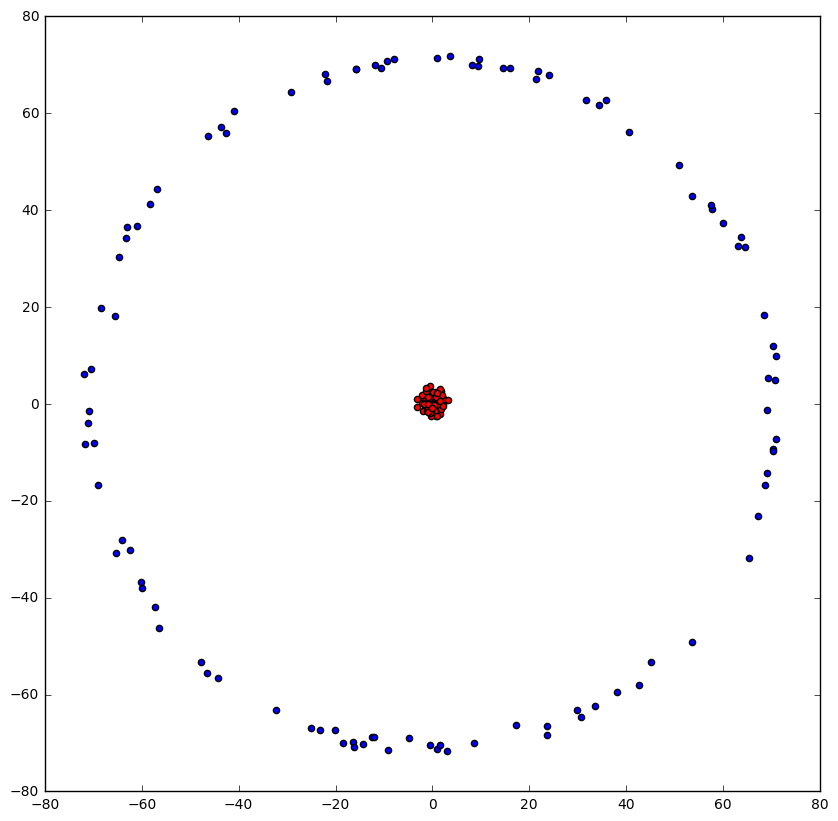

k-nearest neighbor graph - mutual neighbors


/Users/michaelspearing/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


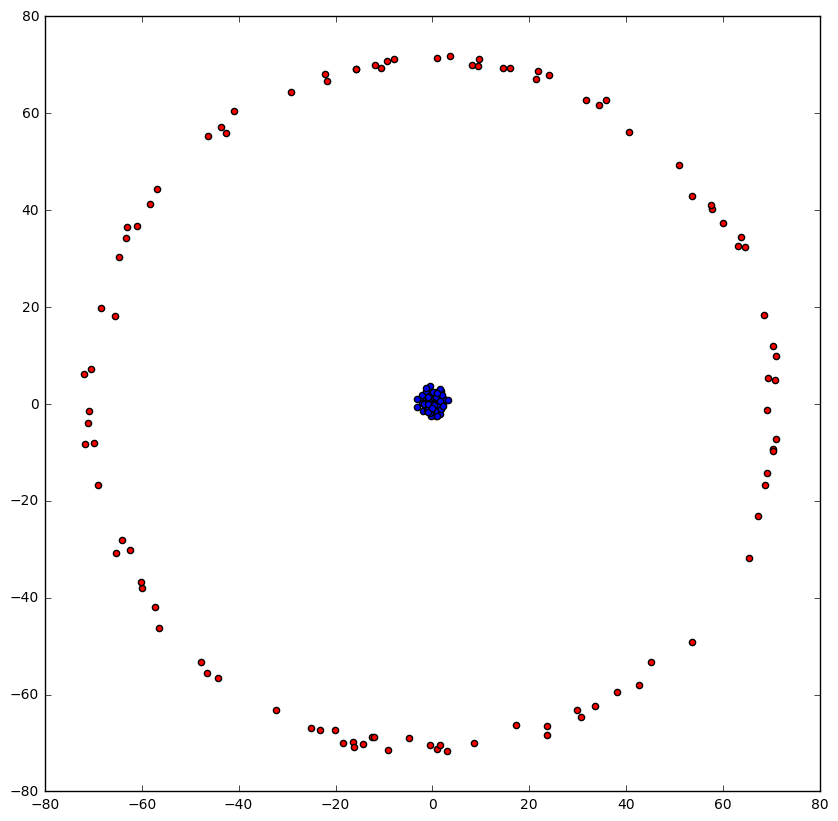

Radial Difference: 65


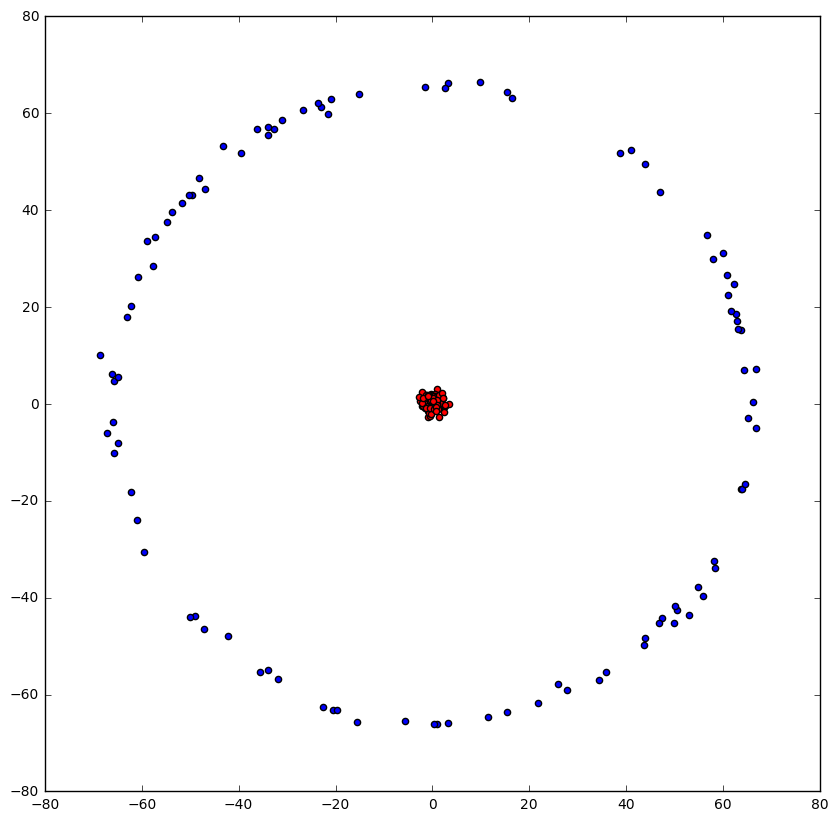

k-nearest neighbor graph - mutual neighbors


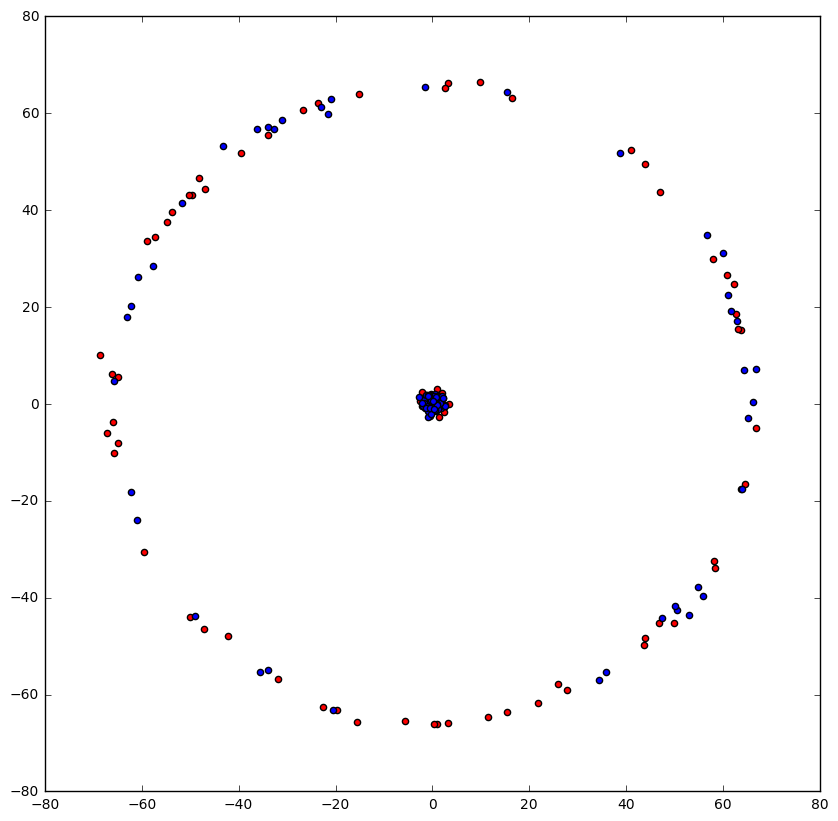

Radial Difference: 60


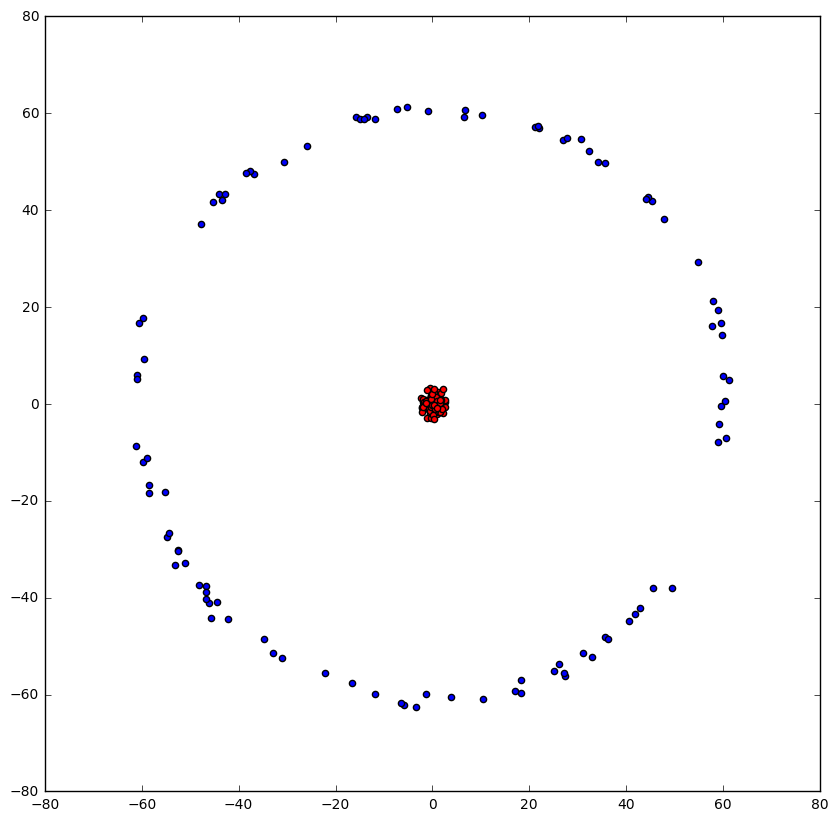

k-nearest neighbor graph - mutual neighbors


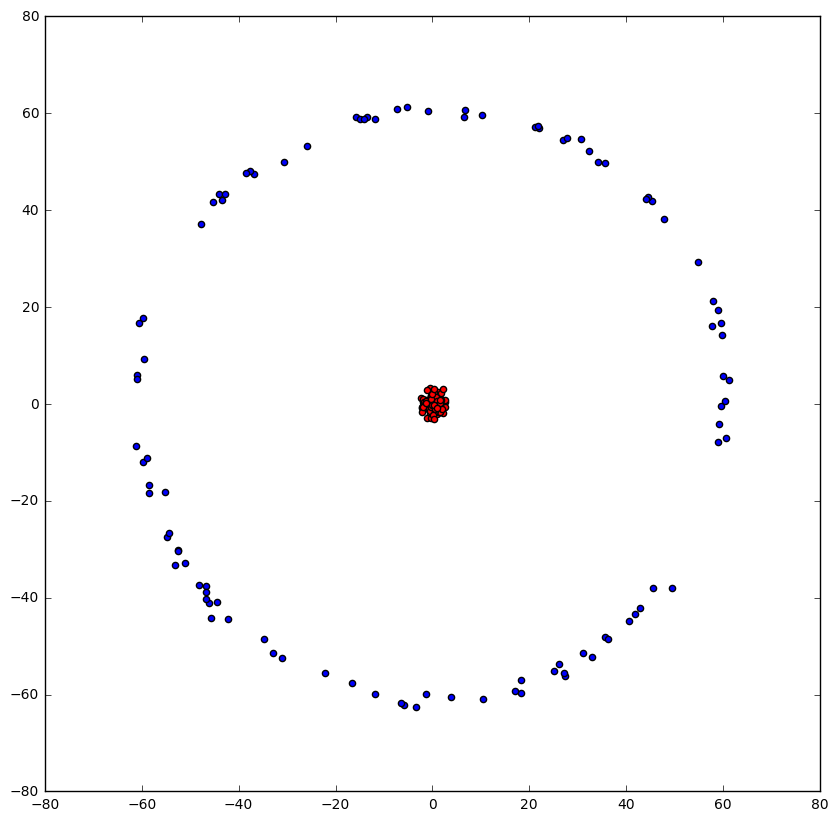

Radial Difference: 50


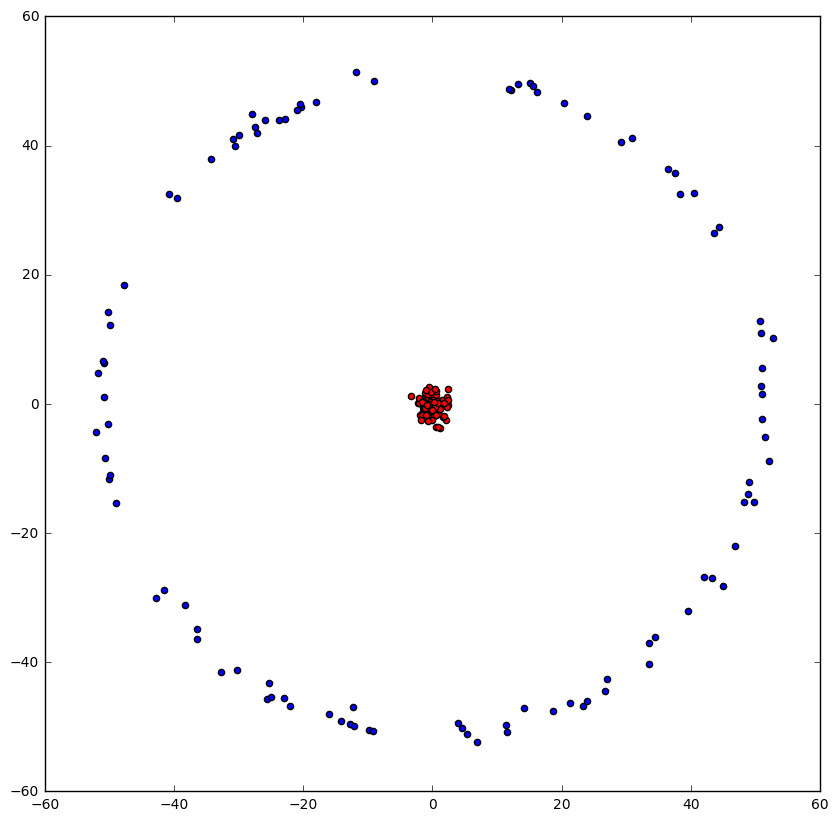

k-nearest neighbor graph - mutual neighbors


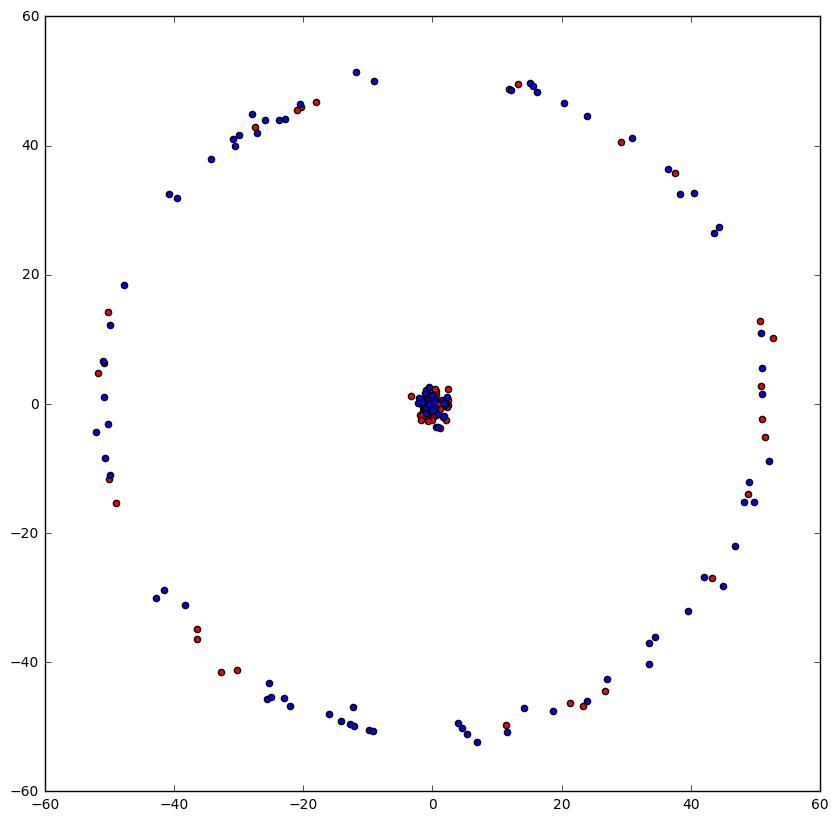

Radial Difference: 10


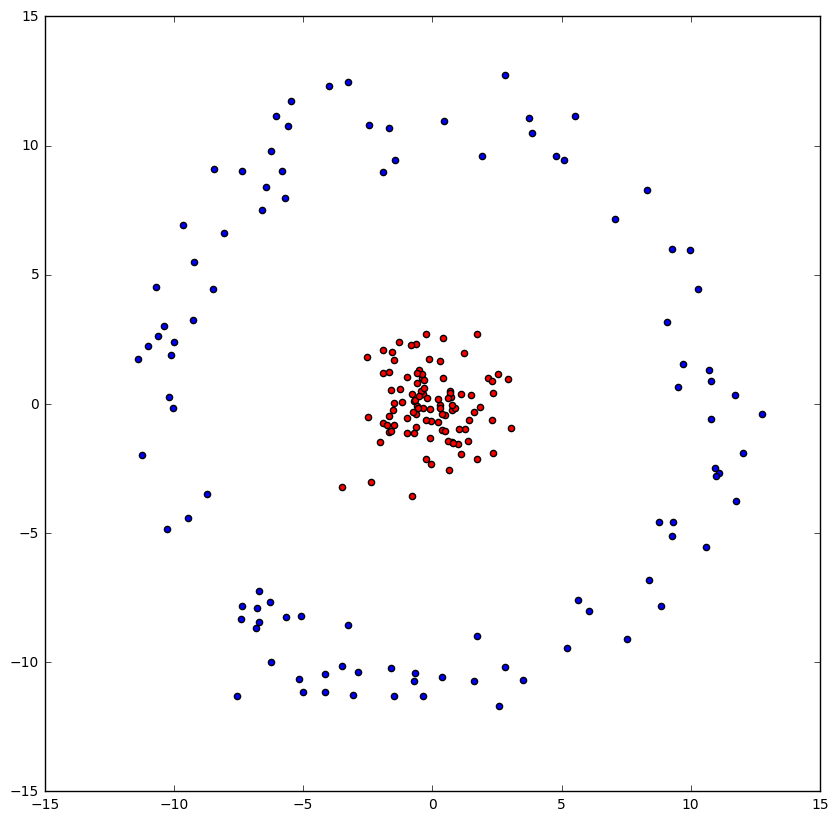

k-nearest neighbor graph - mutual neighbors


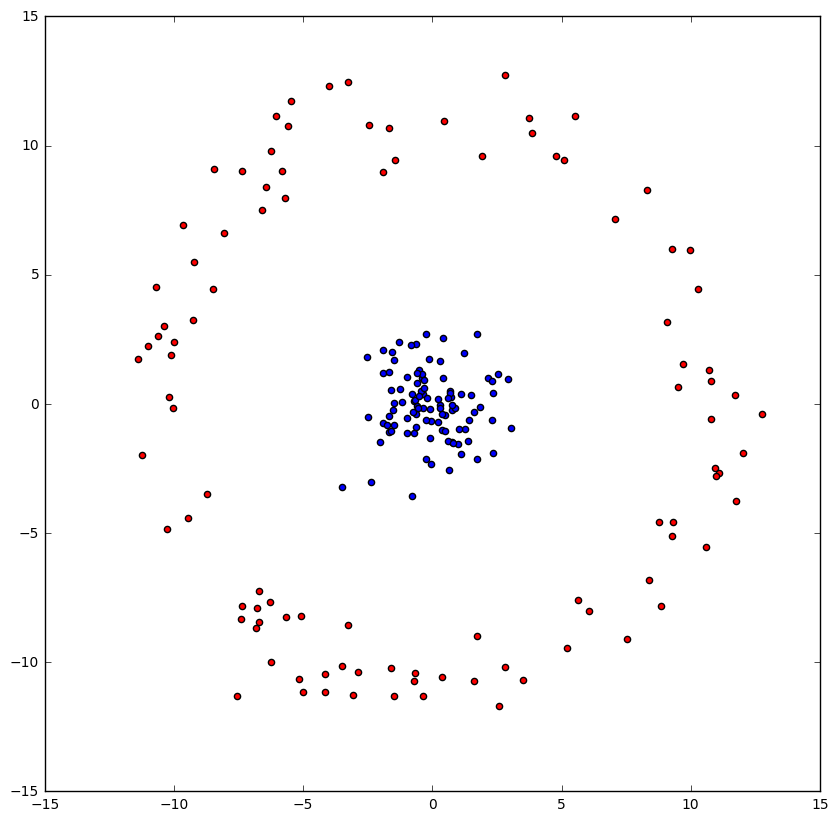

Radial Difference: 9


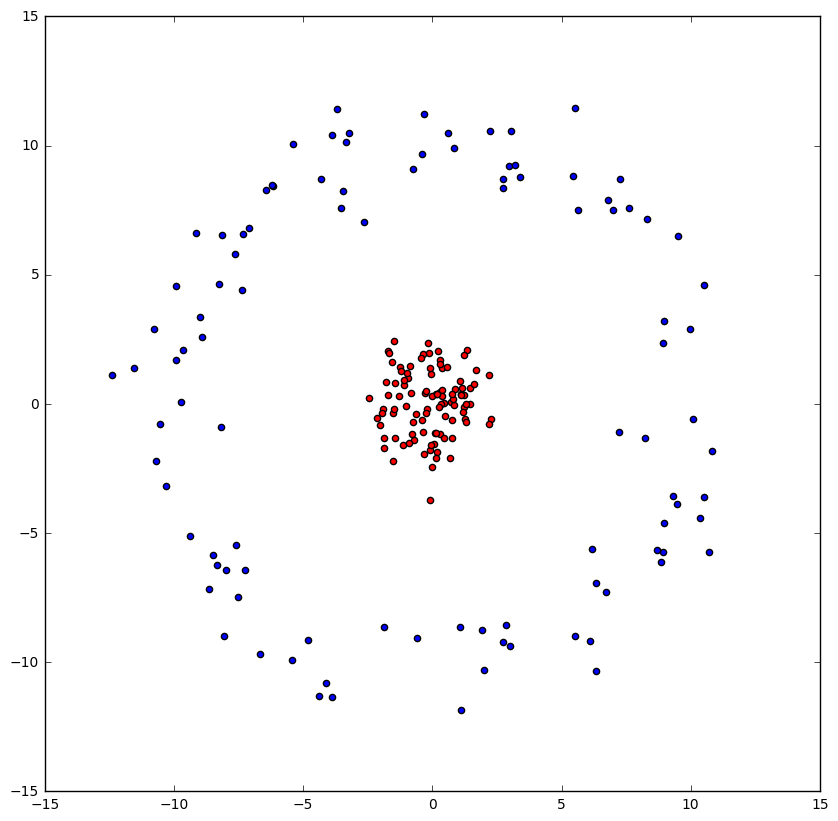

k-nearest neighbor graph - mutual neighbors


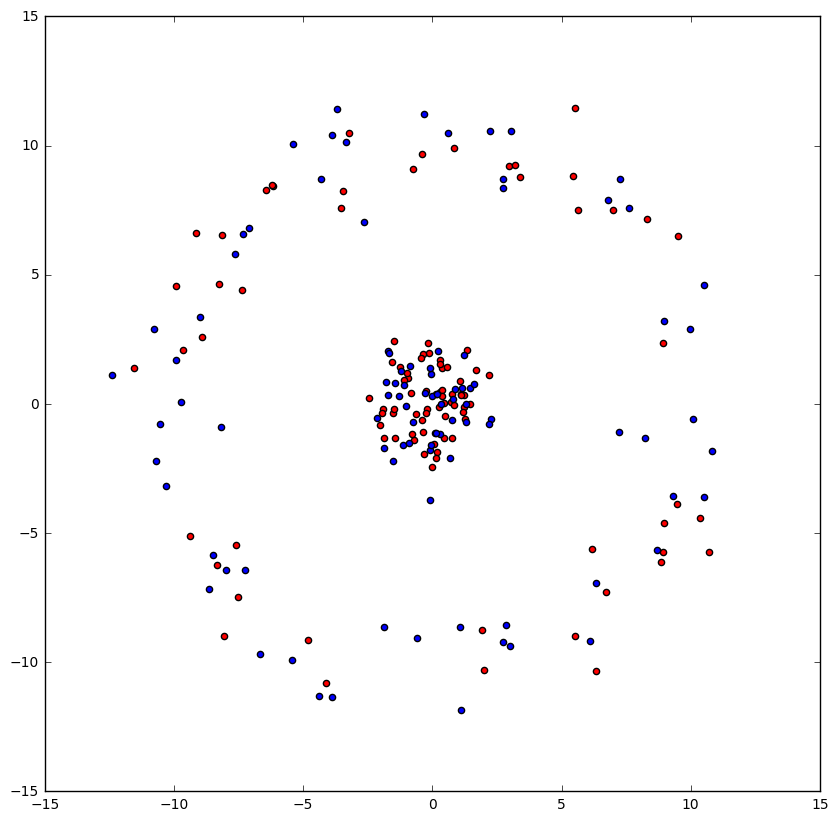

Radial Difference: 8


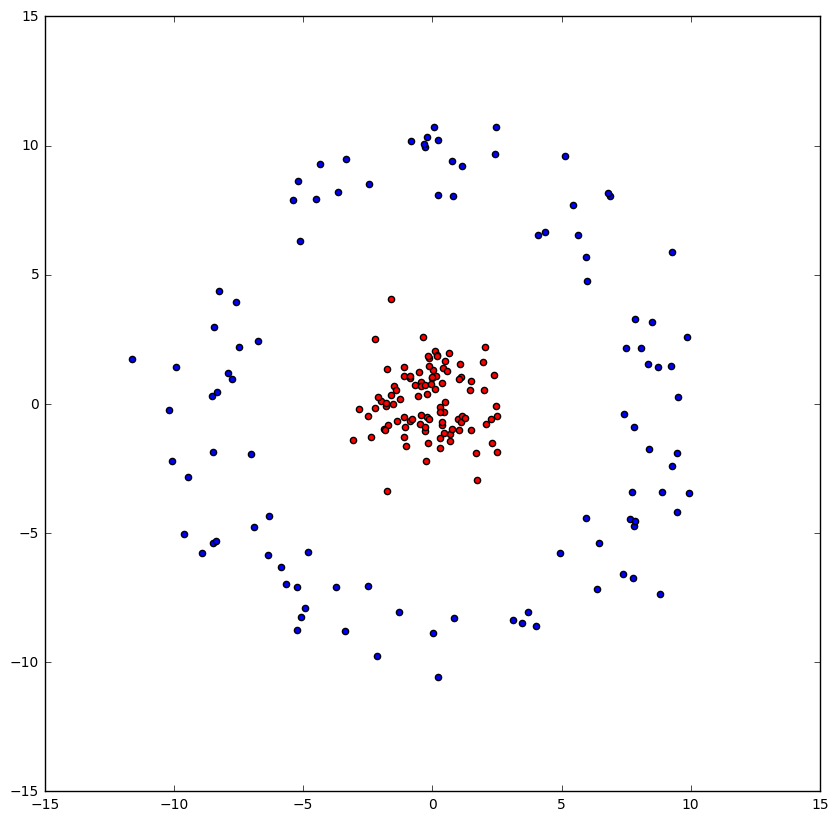

k-nearest neighbor graph - mutual neighbors


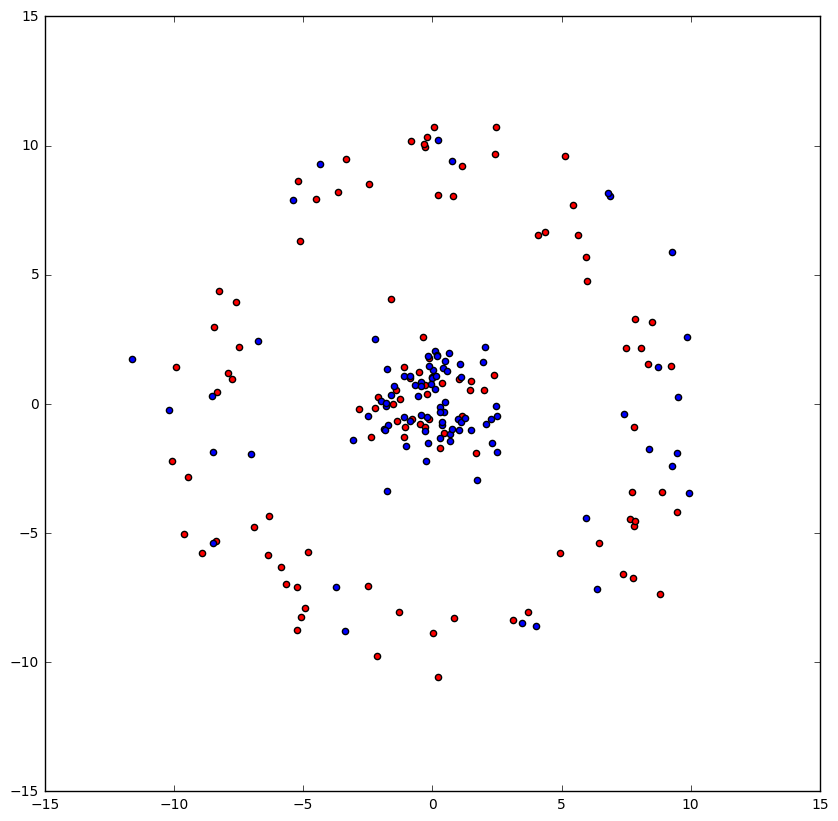

Radial Difference: 7


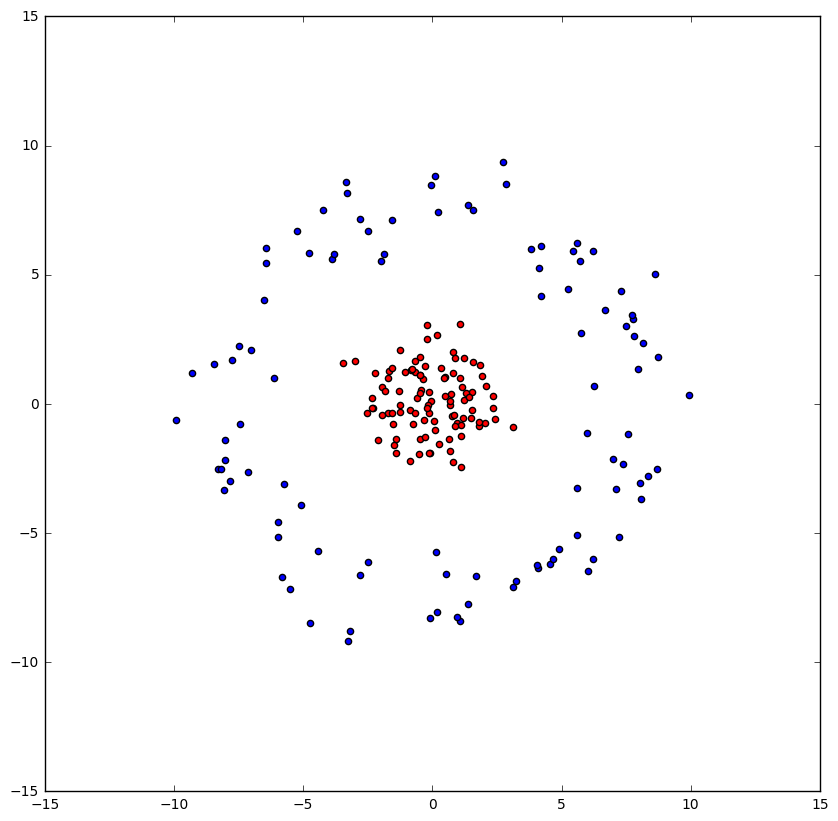

k-nearest neighbor graph - mutual neighbors


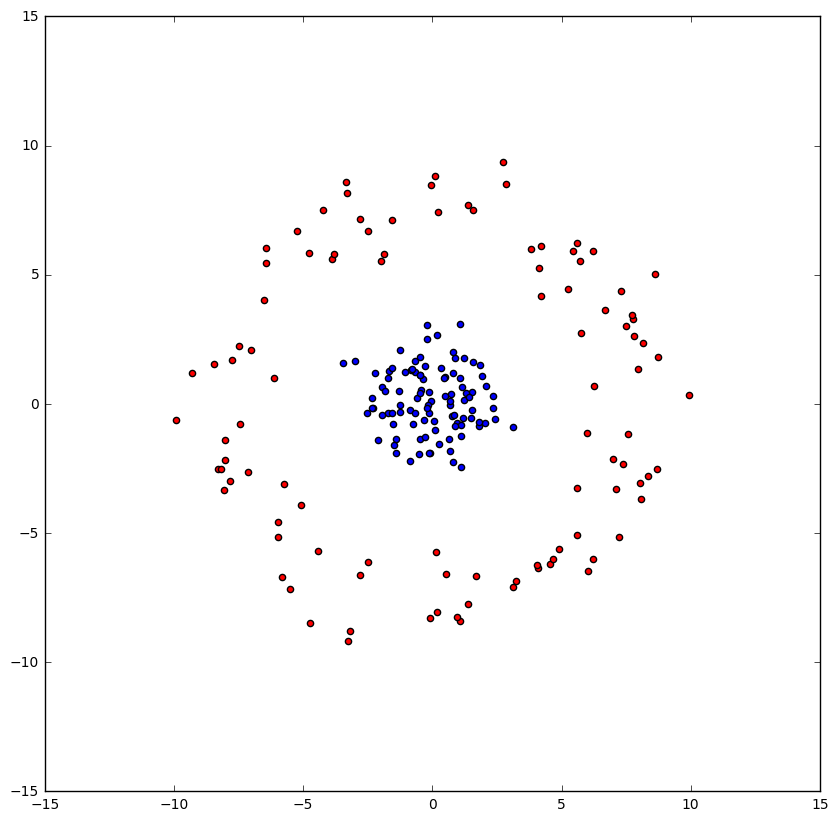

Radial Difference: 6


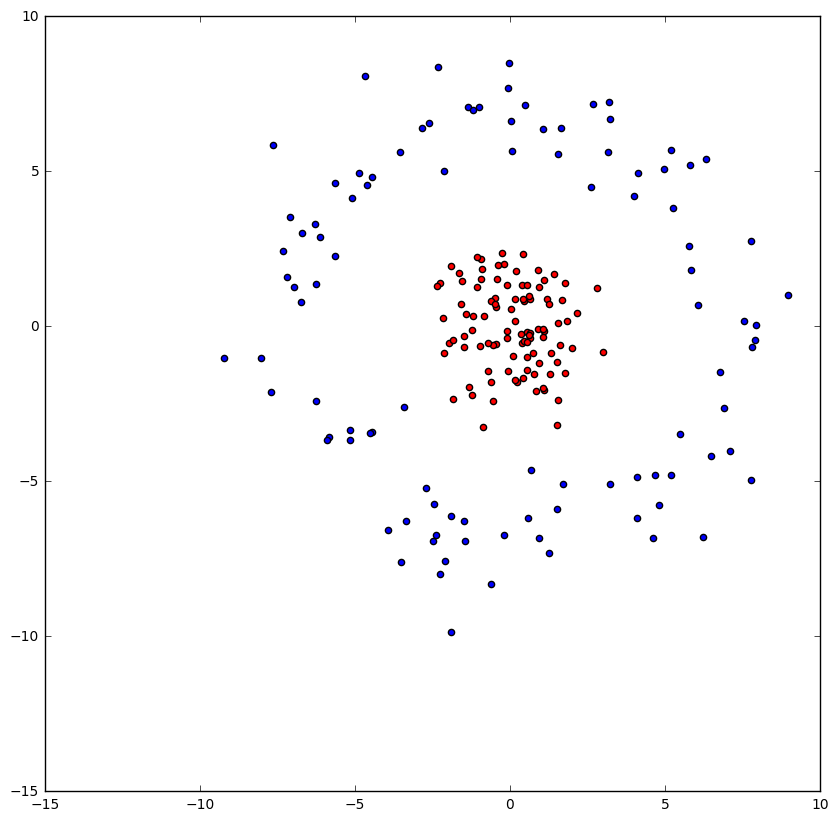

k-nearest neighbor graph - mutual neighbors


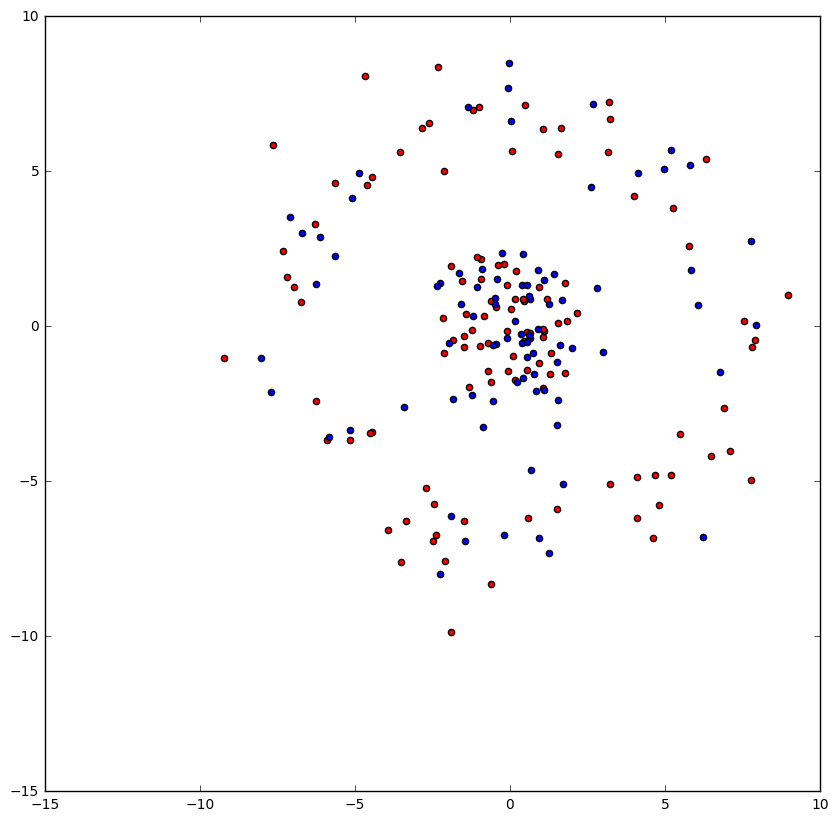

Radial Difference: 5


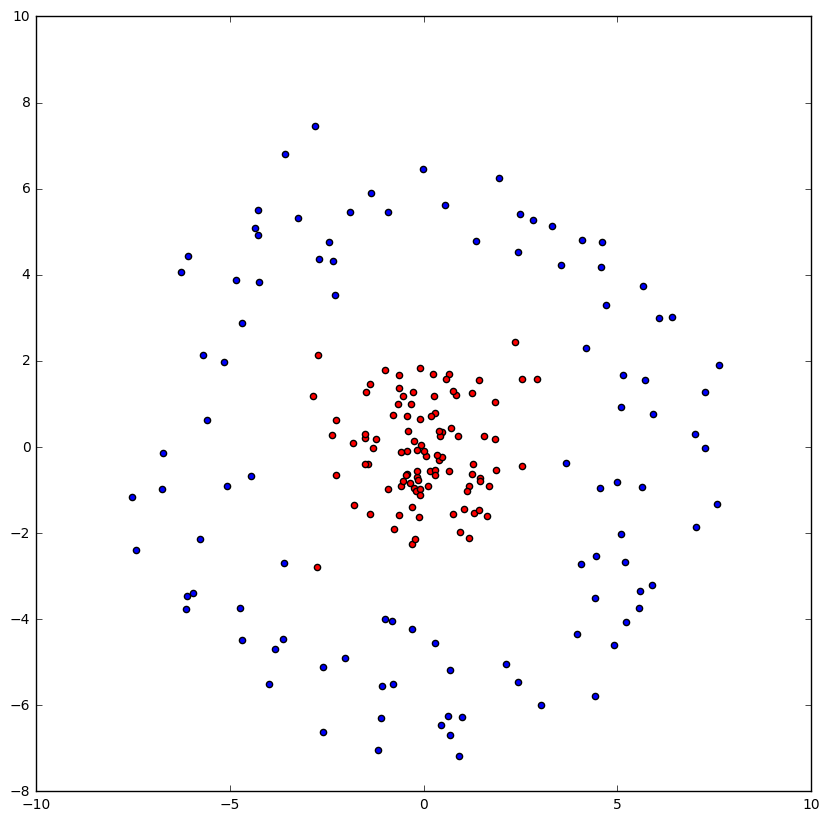

k-nearest neighbor graph - mutual neighbors


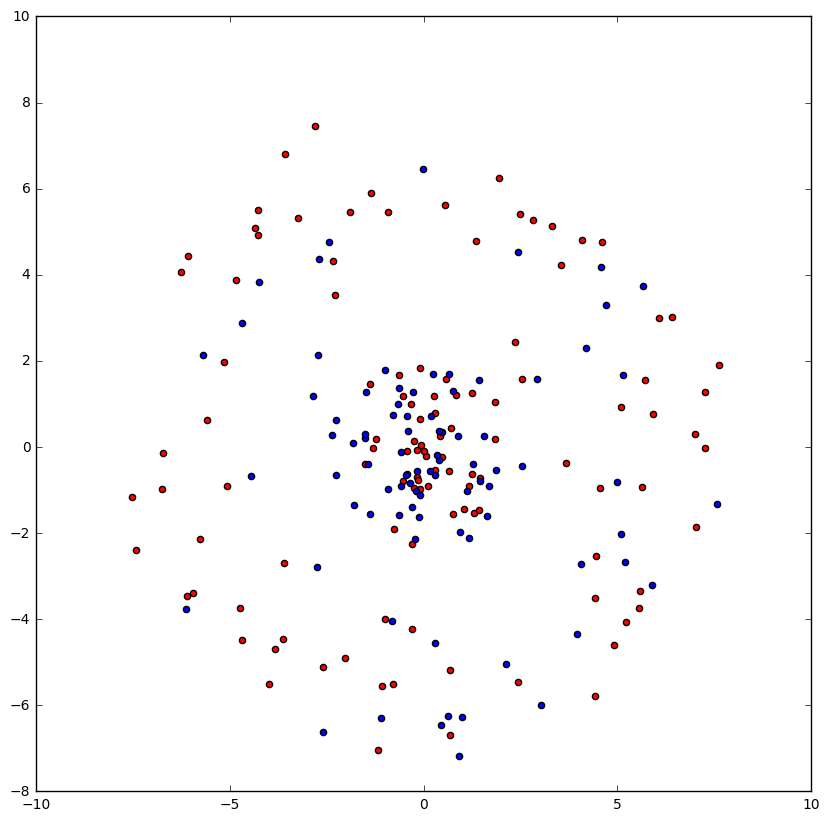

In [23]:
# Find the Range of the outer-ring-radius for which spectral clustering works
# We will use the k-nearest Neighbor, mutual neighbors approach
radii = [70,65,60,50,10,9,8,7,6,5]
neighbors = 10
success = True
for radialDiff in radii:
    print "Radial Difference: " + str(radialDiff)
    data = cocentricDataWithNoise(100,radialDiff,1,1)
    similarityGraph = constructSimilarityGraph(data, 2, neighbors)
    clusters = sc_Normalized_NJW(similarityGraph, 2)
    data = np.hstack((data, clusters.reshape(len(data),1)))
    data1 = data[data[:,2] == 0]
    data2 = data[data[:,2] == 1]
    plt.figure(figsize=(10,10))
    plt.scatter(data1[:,0], data1[:,1], c='r')
    plt.scatter(data2[:,0], data2[:,1], c='b')
    plt.show()

Using the k nearest neighbor approach with k=10, the outer radius must be larger than 6 and less than 60 to identify the two different clusters correctly. It makes sense that the clusters should need to be a certain distance aprt in order to be identified. If they are too close, they will apear to be one continuous distribution with the noise. However, given an inner radius of 1, and variances of 1, this minimum distance should be strictly greater than 3. I think the way I am generating the data is causing for the 2x in the minimum distance. The upper bound is interesting because it indicates that above 60, the points become too spread out. The distance from the outer ring to the inner ring is less than the distance between points. This could be mitigated by increasing the nuber of points.

## Problem 3: Spectrial Clustering vs. K-Means

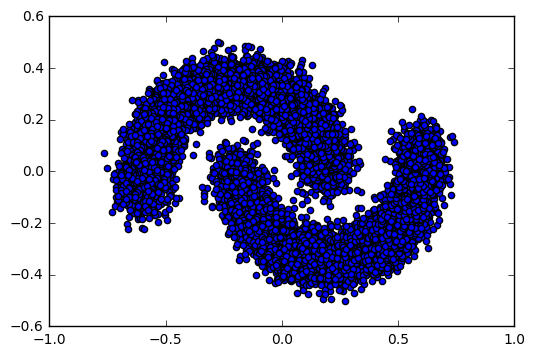

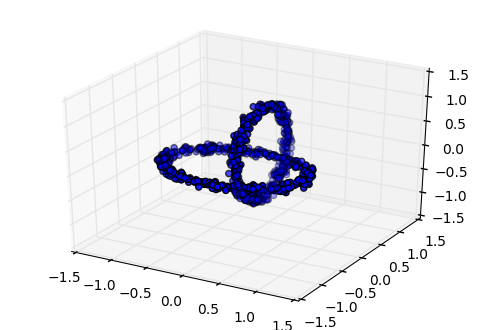

In [7]:
# 1) Input the two CSV files "two_moons.csv" and "linked_chains.csv"
# Plot both. Is it easy to see that there are 2 clusters in each?
two_moons = pd.read_csv("two_moons.csv")
linked_chains = pd.read_csv("linked_chains.csv")
two_moons_X = two_moons.iloc[:,1:]
two_moons_y = two_moons.iloc[:,0]
linked_chains_X = linked_chains.iloc[:,1:]
linked_chains_y = linked_chains.iloc[:,0]
plt.scatter(two_moons_X.iloc[:,0], two_moons_X.iloc[:,1])
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(linked_chains_X.iloc[:,0], linked_chains_X.iloc[:,1], linked_chains_X.iloc[:,2])
plt.show()

In [8]:
# 2) Run K-Means on both. How do you do?
kMeans_tm = KMeans(n_clusters=2).fit(two_moons_X)
tm_predictions = kMeans_tm.predict(two_moons_X)
tm_wrong = 0
for i in range(len(tm_predictions)):
    if(tm_predictions[i] != two_moons_y[i]):
        tm_wrong += 1
print "Percent of data points assigned to the wrong cluster: "
print (tm_wrong / float(len(two_moons))) * 100
print "KMeans Score: "
print kMeans_tm.score(two_moons_X, two_moons_y)

kMeans_lc = KMeans(n_clusters=2).fit(linked_chains_X)
lc_predictions = kMeans_lc.predict(linked_chains_X)
lc_wrong = 0
for i in range(len(lc_predictions)):
    if(lc_predictions[i] != linked_chains_y[i]):
        lc_wrong += 1
print "Percent of data points assigned to the wrong cluster: "
print (lc_wrong / float(len(linked_chains))) * 100
print "KMeans Score: "
print kMeans_lc.score(linked_chains_X, linked_chains_y)

Percent of data points assigned to the wrong cluster: 
90.7451923077
KMeans Score: 
-1188.30797962
Percent of data points assigned to the wrong cluster: 
67.1671671672
KMeans Score: 
-513.126850099


Both of these datasets got very poor results when we attempted to cluster them with the K-Means algorithm. Each time I have run it, it has clustered at least half og the points incorrectly. The K-Means algorithm is attempting to find, in both cases, to two central points to cluster around. However, our data is distributed radially around its true center and these radii overlap. Thus, it makes sense that K-Means clustering would not work well here.

In [9]:
# 3) Find the best similarity function and run spectral clustering. 
# Will this run or are there problems with computational complexity?
# Can you adapt the algorithm from above to accomodate a larger N?

An initial thought: to speed up my algorithm from problem 2, I could only compute 1/2 of the adjacency matrix. Right now, I compute the entire thing and it is very slow. By visually inspecting the data, I think using K nearest neighbors would give the best spectral clustering. The clusters are dense spacially separated from one another enough that they should have neighbors in their own cluster.


In [ ]:
# First, will try with sklearn and see how it performs
k = 10
two_moons_SP_KNN = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=k)
print two_moons_SP_KNN.fit_predict(two_moons_X)

The above would not run. It was too complex for my computer. To try and run it, I will take a sample from the data, every other or every third point, and run the clustering again.

In [ ]:
two_moons_half_X = two_moons_X.iloc[::10,:]
two_moons_half_y = two_moons_y.iloc[::10]
k = 10
two_moons_SP_KNN = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=k)
predict = two_moons_SP_KNN.fit_predict(two_moons_half_X)
wrong = 0
cluster1 = pd.DataFrame()
cluster2 = pd.DataFrame()
for i in range(len(two_moons_half_X)):
    if two_moons_half_y.iloc[i] == 1:
        cluster1 = cluster1.append(two_moons_half_X.iloc[i])
    else:
        cluster2 = cluster2.append(two_moons_half_X.iloc[i])
plt.scatter(cluster1.iloc[:,0], cluster1.iloc[:,1], c='b')
plt.scatter(cluster2.iloc[:,0], cluster2.iloc[:,1], c='r')
plt.show()
print wrong / float(len(two_moons_half_X))

The above ran quickly. To speed up the algorithm, I could spawn multiple threads and give each thread a random subset of the data. This worked for this dataset but could be a poor choice if one or more clusters are significantly smaller than another.

   0
0  1
1  2
2  3
3  4
4  6
5  7
6  8
7  9
0  1
1  2
